# Introduction:
### SMS Spam Collection Data Set

https://archive.ics.uci.edu/ml/datasets/sms+spam+collection

The motivation behind this notebook:

1. Is to explore natural language processing on "text/SMS" type dataset. This data has a lot of spelling errors, uses slang & shorthand form.  

2. Apply simple feature engineering and feature validation to improve model performance

3. Create a bigger corpus for stopwords using external resources for better data pre-processing 

4. Use Xtreme Gradient Boosting algorithm for class imbalanced classification problem.

5. Hypertune the XGboost model to optimize for f1 score. (higher precision & higher recall)

I start off by reading the data in two different ways: 1. The hard way and the 2. The easy way. The reason behind it is because often times we dont know in real life applications about how our data looks like so I pretend that I have an unkown txt file for exploration.

## Reading the data: The hard way

In [2]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt


In [4]:
rawdata = open('SMSSpamCollection').read() # reading the unstructured data
rawdata[0:500] # first 500 characters

"ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\nham\tOk lar... Joking wif u oni...\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tU dun say so early hor... U c already then say...\nham\tNah I don't think he goes to usf, he lives around here though\nspam\tFreeMsg Hey there darling it's been 3 week's now and no word bac"

__We see that the data is seperated by '\t' & '\n' seperators. I will replace all '\n' with '\t'. After replacement I will split the text file on '\t'__

In [5]:
rawdata = rawdata.replace('\n','\t')
#rawdata = rawdata.replace('\t', '-----')
rawdata[0:500]

"ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\tham\tOk lar... Joking wif u oni...\tspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\tham\tU dun say so early hor... U c already then say...\tham\tNah I don't think he goes to usf, he lives around here though\tspam\tFreeMsg Hey there darling it's been 3 week's now and no word bac"

In [6]:
rawlist = rawdata.split('\t')

In [7]:
rawlist[:6]

['ham',
 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham',
 'Ok lar... Joking wif u oni...',
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

__As we can see that we now have semi-unstructured data. The first element is the label and the second element is the text message. We will alternate over the labels & text messages using indexing. This will create two lists: labels and text__

In [174]:
labels = rawlist[0::2]
print(str(len(labels)))
print(labels[:6])

5575
['ham', 'ham', 'spam', 'ham', 'ham', 'spam']


In [175]:
text = rawlist[1::2]
print(str(len(text)))
print(text[:6])

5574
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though", "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv"]


__We notice that during list generation our last element is an empty string within our labels list. This will throw an error when we try to create a pandas DataFrame later on in the notebook. I will remove it and then merge both lists into a pandas dataframe__


In [10]:
labels[-5:]

['ham', 'ham', 'ham', 'ham', '']

In [11]:
labels = labels[:len(labels)-1]
print(labels[-5:])

['spam', 'ham', 'ham', 'ham', 'ham']


In [12]:
df_hard_way = pd.DataFrame(list(zip(text, labels)))

In [13]:
column_names = ['text', 'labels']
df_hard_way.columns = column_names
print(df_hard_way.shape)
print(df_hard_way.labels.unique())

(5574, 2)
['ham' 'spam']


In [14]:
pd.set_option('display.max_colwidth', 150)

In [15]:
df_hard_way.head()

,text,labels
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives around here though",ham


__Our dataframe is not in a structured form where we can apply different operations to it for further data-preprocessing__

## Reading the data: The easy way

In [16]:
easy_way_df = pd.read_csv('SMSSpamCollection', sep = '\t', header= None)

In [17]:
easy_way_df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


__As you can see, I could have read the data in a simple line of code but I choose not to because often in real life we dont get tab-seperated datafiles. So it is better to start off with pretending that we don't know anything about the data...and take it from there__

# Simple EDA

I will start off by simple EDA. In a classification problem, I usually look at the class distribution. Often times the class is imbalanced. To identify this issue we can plot "spam" vs. "ham"

In [18]:
df = df_hard_way.copy(deep=True)

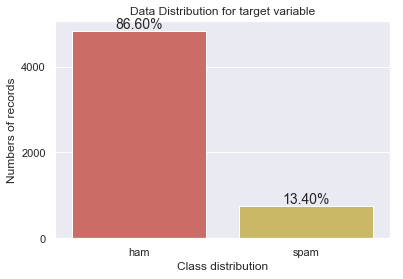

In [19]:
total_len = len(df['labels'])
percentage_labels = (df['labels'].value_counts()/total_len)*100
percentage_labels
sns.set()
sns.set_palette("hls", 8)

sns.countplot(df['labels']).set_title('Data Distribution for target variable')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=3)
ax.set_xlabel("Class distribution")
ax.set_ylabel("Numbers of records")
plt.show()

As we can see from the above plot that there is a class imbalance. 

We can see below that we dont have any missing values so that's good! We will address the class imablance later in the notebook

In [20]:
print(df.isnull().sum())

text      0
labels    0
dtype: int64


# Data Pre-processing

Data preprocessing for NLP tasks usually follows the same steps:

1. Removing punctuation

2. Tokenization

3. Stopword removal 

4. Lemmatization\Stemming 

5. Any additional steps based on how messy the data is

## Removing punctuation:

I will start off by removing punctuation from our data strings of text messages.

In [21]:
from nltk.tokenize import word_tokenize
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
def remove_punkt(string_):
    word_list_no_punkt = "".join([char for char in string_ if char not in string.punctuation])
    return word_list_no_punkt

In [23]:
df['cleaned_text'] = df['text'].apply(lambda x: remove_punkt(x))
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: str.lower(x))

In [24]:
pd.set_option('display.max_colwidth', 50)
df= df[['labels', 'text', 'cleaned_text']]

In [25]:
df.head()

,labels,text,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


## Tokenization

Then I will tokenzie our cleaned_text (punctutation removed) column

In [26]:
df['tokenized_words'] = df['cleaned_text'].apply(lambda x: word_tokenize(x))

In [27]:
df.head()

,labels,text,cleaned_text,tokenized_words
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


## Removing stop words:

For stop word removal we are going to face a little challenge. The reason we remove stop words is because we want to reduce the size of our data. Later during vector representation of words, we don't want words that convey no useful information to make the dimensions of our model huge.

NLTK has stopwords built into it. We we import & look at the first 5 elements we can see them (as shown below)

NLTK stopwords is a list of 179 stop words


On otherside we see that sklearn provides us with its own list of stopwords. 

Sklearn stopwords is a list of 318


__So which one to use?__






### NLTK stop word list: 

In [236]:
import nltk
from nltk.corpus import stopwords
stopwords_nltk = list(stopwords.words('english'))
print(stopwords_nltk[0:5])
print(len(stopwords_nltk))

['i', 'me', 'my', 'myself', 'we']
179


### Sklearn stop word list:

In [176]:
from sklearn.feature_extraction import text
stopwords_sklearn = list(text.ENGLISH_STOP_WORDS)
print(stopwords_sklearn[0:5])
print(len(stopwords_sklearn))

['de', 'so', 'being', 'off', 'down']
318


### Which one to use? 

As we are dealing with text message data. The standard stopword list won't do a good job removing all the words. For this reason we would want to create a bigger corpus of stopwords, that include shortforms of words like 'you' spelled 'u'. 

Doing a little digging on the internet, I came across igorbrigadir's github profile where he has compiled the list of stopword text files found over different python libraries. 

For the purpose of this notebook, we will load the stopwords into a merged stopwords list that will contain unique values from NLTK, sklearn, atire_pruula, and terrier files


## Creating a bigger stopword corpus using: https://github.com/igorbrigadir/stopwords

In [30]:
en_stopwords = pd.read_csv('C:/Users/1234567890/Desktop/python projects/stopwords-master/en_stopwords.csv')
en_stopwords

,lang,file,name,size,source_url,description
0,en,_none.txt,_None_,0,en/_none.txt,No stop word removal.
1,en,galago_forumstop.txt,Galago (forumstop),15,https://sourceforge.net/p/lemur/galago/ci/defa...,Short list of forum slang. Included in the Lem...
2,en,ebscohost_medline_cinahl.txt,EBSCOhost,24,https://help.ebsco.com/interfaces/CINAHL_MEDLI...,The stop words used in EBSCOhost medical datab...
3,en,corenlp_hardcoded.txt,CoreNLP (Hardcoded),28,https://github.com/stanfordnlp/CoreNLP/blob/ma...,Hardcoded in src/edu/stanford/nlp/coref/data/W...
4,en,ranksnl_oldgoogle.txt,Ranks NL (Google),32,http://www.ranks.nl/stopwords,The short stopwords list below is based on wha...
5,en,lucene_elastisearch.txt,"Lucene, Solr, Elastisearch",33,https://github.com/apache/lucene-solr/blob/mas...,(NOTE: Some config files have extra 's' and 't...
6,en,mysql_innodb.txt,MySQL (InnoDB),36,http://dev.mysql.com/doc/refman/8.0/en/innodb-...,A word that is used by default as a stopword f...
7,en,ovid.txt,Ovid (Medical information services),39,http://resourcecenter.ovid.com/site/products/f...,Words of little intrinsic meaning that occur t...
8,en,bow_short.txt,"Bow (libbow, rainbow, arrow, crossbow)",48,http://www.cs.cmu.edu/~mccallum/bow/src/bow-20...,Bow: A Toolkit for Statistical Language Modeli...
9,en,lingpipe.txt,LingPipe,76,http://alias-i.com/lingpipe/docs/api/com/alias...,An EnglishStopTokenizerFactory applies an Engl...


### 1. Using atire_puurula.txt

###  __Included in paper:__ Cumulative Progress in Language Models for Information Retrieval 
http://www.aclweb.org/anthology/U13-1013

In [243]:
stopword_data = open('C:/Users/1234567890/Desktop/python projects/stopwords-master/en/atire_puurula.txt').read() # reading the unstructured data
stopword_data[0:115] # first 115 characters

"'ll\n've\n1-1\na\na's\nable\nabout\nabove\nabroad\nabst\naccordance\naccording\naccordingly\nacross\nact\nactually\nadded\nadj\nadopt"

In [244]:
stopwords_atire_puruula = stopword_data.split('\n')
print(stopwords_atire_puruula[:50])
print(len(stopwords_atire_puruula))

["'ll", "'ve", '1-1', 'a', "a's", 'able', 'about', 'above', 'abroad', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act', 'actually', 'added', 'adj', 'adopted', 'affected', 'affecting', 'affects', 'after', 'afterwards', 'again', 'against', 'ago', 'ah', 'ahead', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'alongside', 'already', 'also', 'although', 'always', 'am', 'amid', 'amidst', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and']
989


#### The atire_puurula corpus of stopwords has 989 unique stopwords

### 2. terrier.txt

### Terrier Retrieval Engine “Stopword list to load can be loaded from the stopwords.filename property.”

In [241]:
stopword_data = open('C:/Users/1234567890/Desktop/python projects/stopwords-master/en/terrier.txt').read() # reading the unstructured data
stopword_data[0:115] # first 115 characters

'x\ny\nyour\nyours\nyourself\nyourselves\nyou\nyond\nyonder\nyon\nye\nyet\nz\nzillion\nj\nu\numpteen\nusually\nus\nusername\nuponed\nupon'

In [242]:
stopwords_terrier = stopword_data.split('\n')
print(stopwords_terrier[:50])
print(len(stopwords_terrier))

['x', 'y', 'your', 'yours', 'yourself', 'yourselves', 'you', 'yond', 'yonder', 'yon', 'ye', 'yet', 'z', 'zillion', 'j', 'u', 'umpteen', 'usually', 'us', 'username', 'uponed', 'upons', 'uponing', 'upon', 'ups', 'upping', 'upped', 'up', 'unto', 'until', 'unless', 'unlike', 'unliker', 'unlikest', 'under', 'underneath', 'use', 'used', 'usedest', 'r', 'rath', 'rather', 'rathest', 'rathe', 're', 'relate', 'related', 'relatively', 'regarding', 'really']
734


#### The terrier corpus has 734 unique stopwords

## Combining sklearn, nltk, atire_puruula, & terrier stopword list: 

In [35]:
stopwords_merged= list(set(stopwords_nltk + stopwords_sklearn + stopwords_atire_puruula + stopwords_terrier))

In [36]:
stopwords_merged = sorted(stopwords_merged)
print(stopwords_merged[-20:])


['yond', 'yonder', 'you', "you'd", "you'll", "you're", "you've", 'youd', 'young', 'younger', 'youngest', 'your', 'yourabout', 'youre', 'yours', 'yourself', 'yourselves', 'z', 'zero', 'zillion']


In [245]:
print("TOTAL UNIQUE WORDS IN NEW STOPWORD LIST: ", len(stopwords_merged))

TOTAL UNIQUE WORDS IN NEW STOPWORD LIST:  1369


#### Our new merged stopwords list contains 1369 stopwords 

## Removing stopwords using merged list

Now we will remove all the stopwords using our new merged list  

In [38]:
def remove_stopwords(tokenized_words):
    stopwords_removed = [word for word in tokenized_words if word not in stopwords_merged]
    return stopwords_removed

In [39]:
df['stop_words_removed'] = df['tokenized_words'].apply(lambda x: remove_stopwords(x))

In [40]:
df.head()

,labels,text,cleaned_text,tokenized_words,stop_words_removed
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[jurong, crazy, bugis, la, buffet, cine, amore..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[dun, hor]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, usf, lives]"


## Lemmatization or Stemming?

Stemming algorithms work by cutting off the end or the beginning of the word, taking into account a list of common prefixes and suffixes that can be found in an inflected word. 

Lemmatization, on the other hand, takes into consideration the morphological analysis of the words. To do so, it is necessary to have detailed dictionaries which the algorithm can look through to link the form back to its lemma.


For our case the text messages will not work good on lemmatization or stemming as they are already mispelled or written in short hand. But I will lemmatize for our notebook using NLTK.

I will not use stemming for the fear of chopping of words incorrectly as they are misspelled we dont want weird chopping of words

In [41]:
wnlm = nltk.WordNetLemmatizer()

In [42]:
def lemmatize(tokens):
    lemmatized = [wnlm.lemmatize(token) for token in tokens]
    return lemmatized


In [43]:
df['lemmatized_words'] = df['stop_words_removed'].apply(lambda x: lemmatize(x))
df.head()

,labels,text,cleaned_text,tokenized_words,stop_words_removed,lemmatized_words
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[jurong, crazy, bugis, la, buffet, cine, amore...","[jurong, crazy, bugis, la, buffet, cine, amore..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[lar, joking, wif, oni]","[lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[dun, hor]","[dun, hor]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, usf, lives]","[nah, dont, usf, life]"


# Simple Feature Engineering: 


To provide our model will additional information. I will apply simple feature engineering.

I will hypothesize the following 3 theories & will test them out to see if they are accurate or not. 

### Hypothesis 1: Length of spam text messages is longer than ham text messages

To get our new feature, I will create a new column called length_text which will have the length of the text message. 

In [44]:
df['length_text'] = df['text'].apply(lambda x: len(x) - x.count(" ")) # length of string - spaces 

In [45]:
df.head()

,labels,text,cleaned_text,tokenized_words,stop_words_removed,lemmatized_words,length_text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[jurong, crazy, bugis, la, buffet, cine, amore...","[jurong, crazy, bugis, la, buffet, cine, amore...",92
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[lar, joking, wif, oni]","[lar, joking, wif, oni]",24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",128
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[dun, hor]","[dun, hor]",39
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, usf, lives]","[nah, dont, usf, life]",49


### Hypothesis 2: Spam text messages have more capitalized letters than ham text messages

We will create a new column called capital%. Which is just the percentage of capitalized letters in the text message.

In [46]:
def capital_letters(text):
    k = sum([1 for i in text if i.isupper()])
    capital_percent = k/(len(text) - text.count(" "))*100
    return round(capital_percent,3)

In [47]:
df['capital%'] = df['text'].apply(lambda x: capital_letters(x))
df.head()

,labels,text,cleaned_text,tokenized_words,stop_words_removed,lemmatized_words,length_text,capital%
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[jurong, crazy, bugis, la, buffet, cine, amore...","[jurong, crazy, bugis, la, buffet, cine, amore...",92,3.261
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[lar, joking, wif, oni]","[lar, joking, wif, oni]",24,8.333
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",128,7.812
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[dun, hor]","[dun, hor]",39,5.128
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, usf, lives]","[nah, dont, usf, life]",49,4.082


### Hypothesis 3: Spam text messages have more punctuation than than ham text messages

Finally, we will create a column called punc% which is the percentage of punctuation used in the text message

In [48]:
def punc_percent(k):
    punkt = sum([1 for i in k if i in string.punctuation])
    return round(punkt/(len(k) - k.count(" "))*100,3)

In [49]:
df['punc%'] = df['text'].apply(lambda x: punc_percent(x))
df.head()

,labels,text,cleaned_text,tokenized_words,stop_words_removed,lemmatized_words,length_text,capital%,punc%
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[jurong, crazy, bugis, la, buffet, cine, amore...","[jurong, crazy, bugis, la, buffet, cine, amore...",92,3.261,9.783
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[lar, joking, wif, oni]","[lar, joking, wif, oni]",24,8.333,25.000
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",128,7.812,4.688
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[dun, hor]","[dun, hor]",39,5.128,15.385
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, usf, lives]","[nah, dont, usf, life]",49,4.082,4.082


## Hypothesis Testing for Engineered Features: 

### Feature evaluation & testing our hypothesis using: Overlaid Histograms Method 

For our hypothesis testing we will superimpose the two histograms for our newly created feature. We would want to see the histograms seperated out. If they are then we know that the two distinct distributions support our hypothesis. 

Let's begin!

#### Hypothesis 1: Length of spam text messages is longer than ham text messages


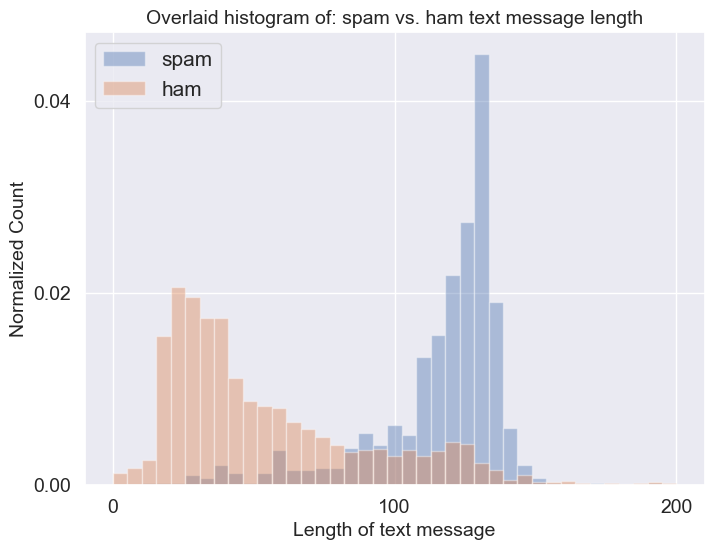

In [112]:
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot(111, xlabel='Length of text message', ylabel='Normalized Count', title='Overlaid histogram of: spam vs. ham text message length')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
bins = np.linspace(0,200,40)
plt.hist(df[df['labels'] == 'spam']['length_text'], bins, alpha = 0.4, normed =True, label = 'spam')
plt.hist(df[df['labels'] == 'ham']['length_text'], bins, alpha = 0.4, normed =True, label = 'ham')
plt.legend(loc=2, prop={'size': 15})
plt.show()
warnings.filterwarnings("ignore")


As we can see clearly that spam and ham are seperated. Spam tend to have a longer length of text messages than ham. This is good!

#### Hypothesis 2: Spam text messages have more capitalized letters than ham text messages


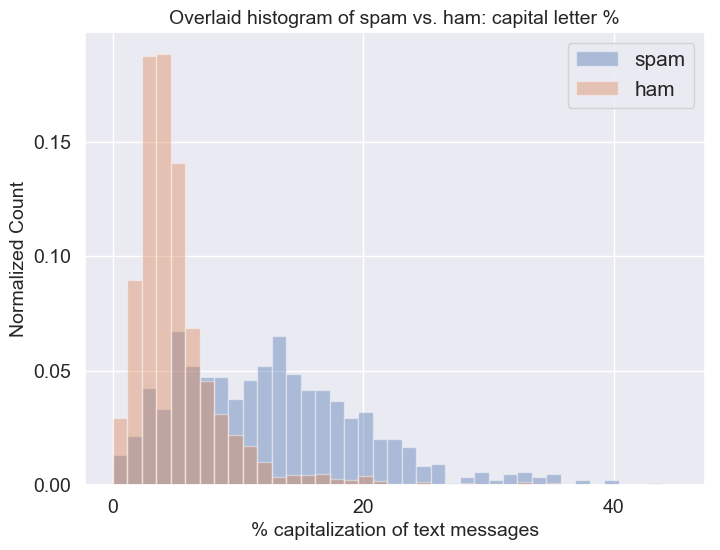

In [51]:
figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot(111, xlabel='% capitalization of text messages', ylabel='Normalized Count', title='Overlaid histogram of spam vs. ham: capital letter %')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
bins = np.linspace(0,45,40)
plt.hist(df[df['labels'] == 'spam']['capital%'], bins, alpha = 0.4, normed =True, label = 'spam')
plt.hist(df[df['labels'] == 'ham']['capital%'], bins, alpha = 0.4, normed =True, label = 'ham')
plt.legend(loc='upper right', prop={'size': 15})
plt.show()

With capitalization percentage the distiction is not as clear as text_length but it is still there. This will provide our model good information

#### Hypothesis 3: Spam text messages have more punctuation than than ham text messages

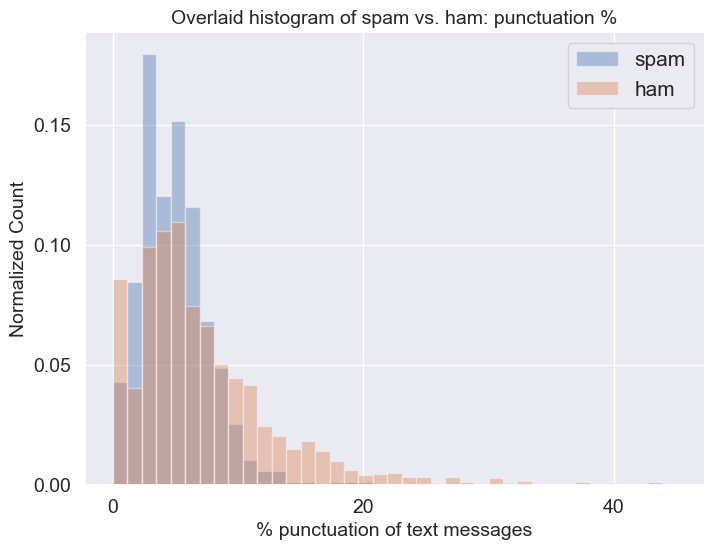

In [52]:
figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot(111, xlabel='% punctuation of text messages', ylabel='Normalized Count', title='Overlaid histogram of spam vs. ham: punctuation %')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
bins = np.linspace(0,45,40)
plt.hist(df[df['labels'] == 'spam']['punc%'], bins, alpha = 0.4, normed =True, label = 'spam')
plt.hist(df[df['labels'] == 'ham']['punc%'], bins, alpha = 0.4, normed =True, label = 'ham')
plt.legend(loc='upper right', prop={'size': 15})
plt.show()

We can see from superimposed histogram above that the % of punctuation is overlapping. Although spam have a high count and ham has a trailing tail. We will keep this feature for now. Although our this is the weakest hypothesis out of all of them.

## Potential transformations to elimate skew or a long tail 

We have studied our super imposed histograms but we should also look for skew and long trailing tails. To do that we will first plot a histogram & then a a simple Kernel Density Estimate graph to study our distributions

### 1. Length of text: 

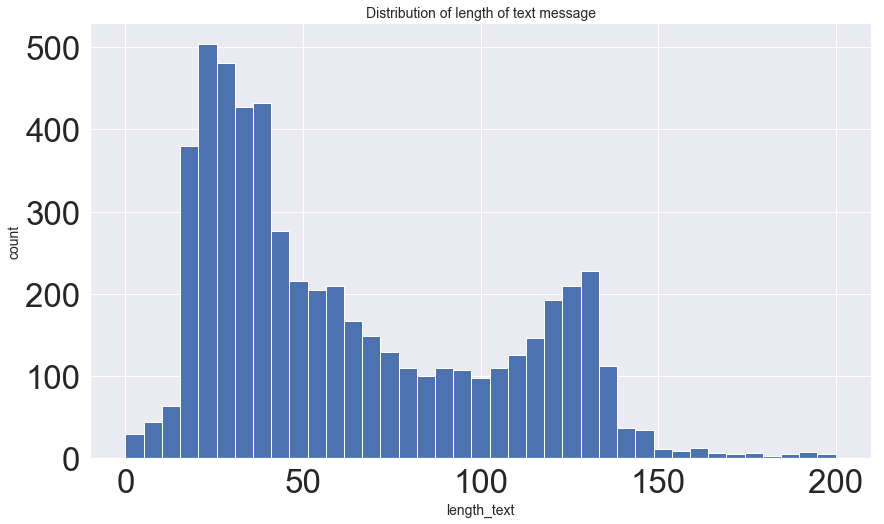

In [143]:
bins = np.linspace(0,200,40)
plt.figure(figsize=(14, 8))
plt.hist(df['length_text'],bins)
plt.title("Distribution of length of text message", fontsize= 14)
plt.xlabel("length_text", fontsize = 14)
plt.ylabel("count", fontsize = 14)
plt.show()


[]

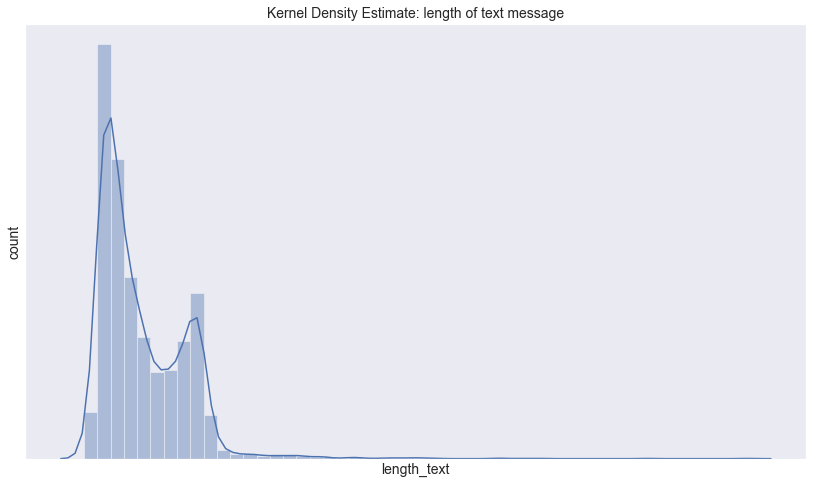

In [147]:
plt.figure(figsize=(14, 8))
ax = sns.distplot(df['length_text'], kde=True)
#plt.setp(ax.get_legend().get_texts(), fontsize='15')
#plt.xlim(0,350)
plt.title("Kernel Density Estimate: length of text message", fontsize= 14)
plt.setp(ax,yticks=[])
plt.xlabel("length_text", fontsize = 14)
plt.ylabel("count", fontsize = 14)
plt.setp(ax,xticks=[])

As we can see this seems like a bi-modal distribution. There is no reason to apply transformation to this variable

### 2. Capitalization %

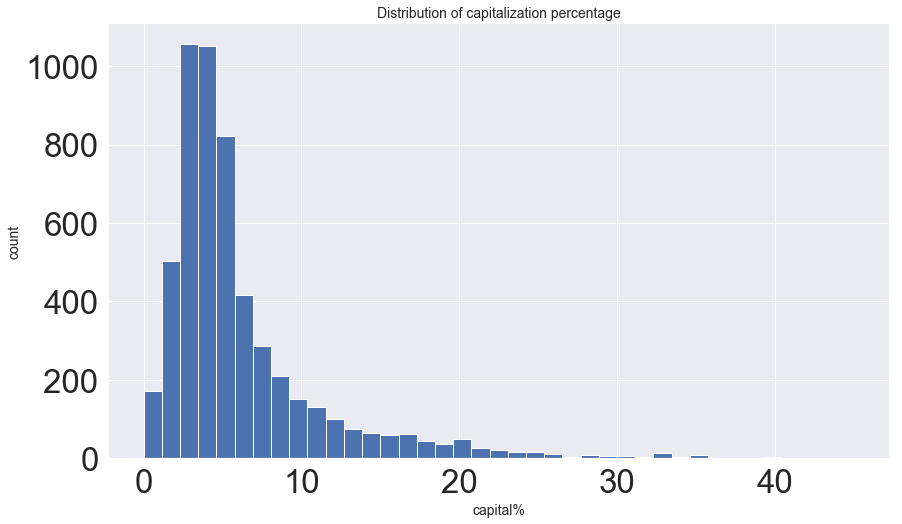

In [152]:
bins = np.linspace(0,45,40)
plt.figure(figsize=(14, 8))
plt.hist(df['capital%'],bins)
plt.title("Distribution of capitalization percentage", fontsize= 14)
plt.xlabel("capital%", fontsize = 14)
plt.ylabel("count", fontsize = 14)
plt.show()

[]

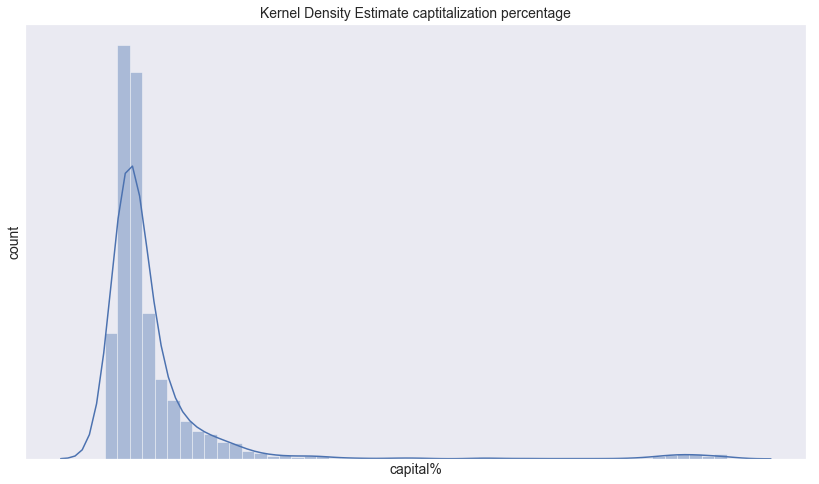

In [150]:
plt.figure(figsize=(14, 8))
ax = sns.distplot(df['capital%'], kde=True)
#plt.setp(ax.get_legend().get_texts(), fontsize='15')
#plt.xlim(0,350)
plt.title("Kernel Density Estimate captitalization percentage", fontsize= 14)
plt.setp(ax,yticks=[])
plt.xlabel("capital%", fontsize = 14)
plt.ylabel("count", fontsize = 14)
plt.setp(ax,xticks=[])

This variable seems to have a skew and a long trailing tail. We will apply some transformation (explained below) to remove the skew. This will improve our model performance.

### 3. Punctuation %

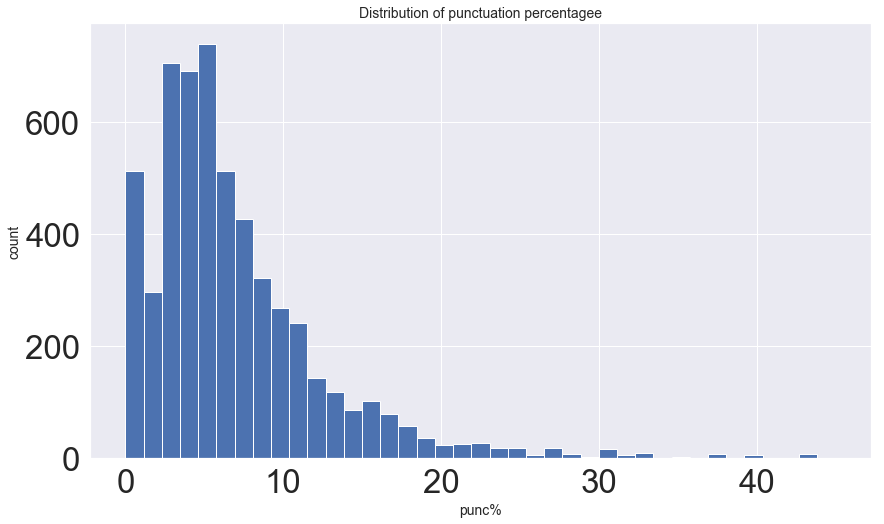

In [146]:

bins = np.linspace(0,45,40)
plt.figure(figsize=(14, 8))
plt.hist(df['punc%'],bins)
plt.title("Distribution of punctuation percentagee", fontsize= 14)
plt.xlabel("punc%", fontsize = 14)
plt.ylabel("count", fontsize = 14)
plt.show()

In [ ]:
plt.figure(figsize=(14, 8))
ax = sns.distplot(df['punc%'], kde=True)
#plt.setp(ax.get_legend().get_texts(), fontsize='15')
#plt.xlim(0,350)
plt.title("Distribution of punctuation percentage", fontsize= 14)
plt.setp(ax,yticks=[])
plt.xlabel("punc%", fontsize = 14)
plt.ylabel("count", fontsize = 14)
plt.setp(ax,xticks=[])

Same is the case with this variable. 

## Box-Cox Power Transformation

Some commonly used transofrmation is the box-cox transform. This shifts the skew to the middle and evenly distributes the data.

**Base Form**: $$ y^x $$

| X    | Base Form           |           Transformation               |
|------|--------------------------|--------------------------|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ log(y) $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |


**Process**
1. Determine what range of exponents to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution

I will try 5 different exponents & see which one is the best. I will plot them so you can see how the distribution shifts from skew to almost no skew

### Capital% Transformation:

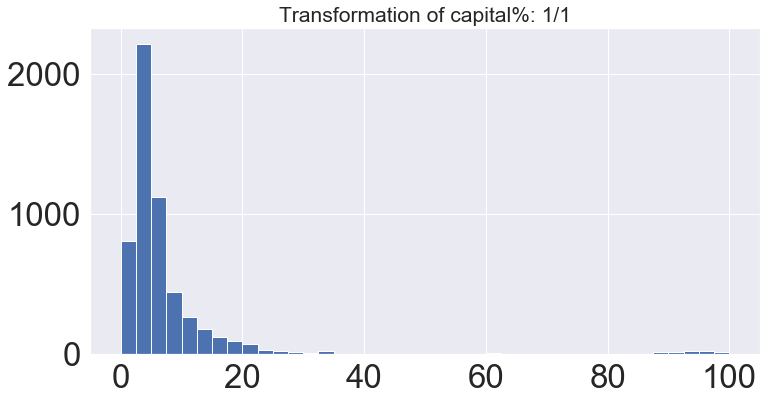

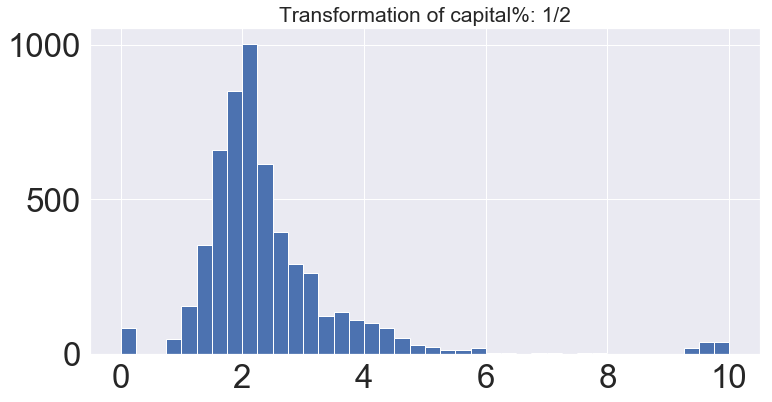

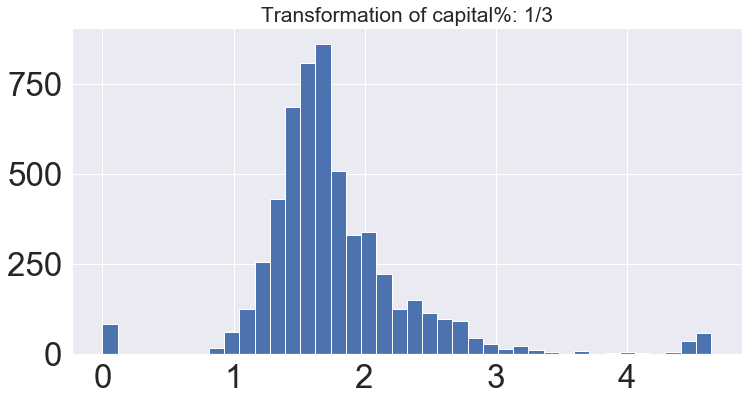

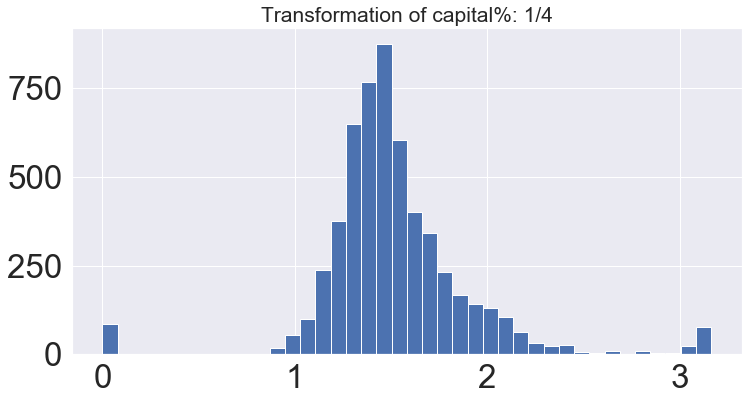

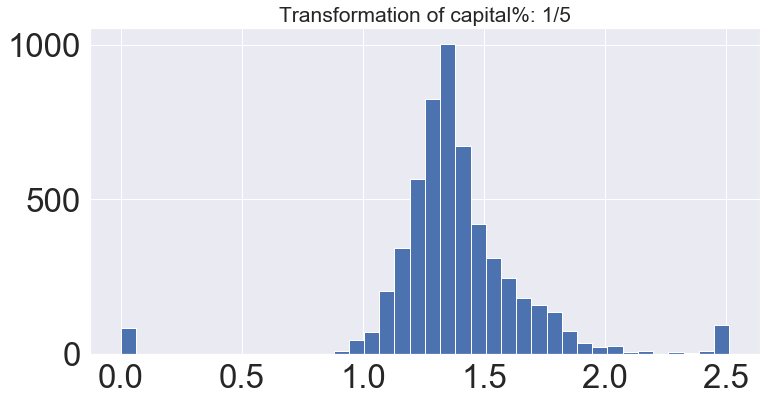

In [169]:
for i in [1,2,3,4,5]:
    plt.figure(figsize=(12, 6))
    plt.hist((df['capital%'])**(1/i), bins = 40)
    
    plt.title("Transformation of capital%: 1/{}".format(str(i)),fontsize = 21)
    plt.show()

#### The exponent of 4 seems to be the best. We dont care about the data on the edges but are rather concerned about the middle part reflecting a normal distribution

NOTE: There are more robust statistcal methods to determine skewness. I will not cover them in this notebook

### Punc% Transformation:

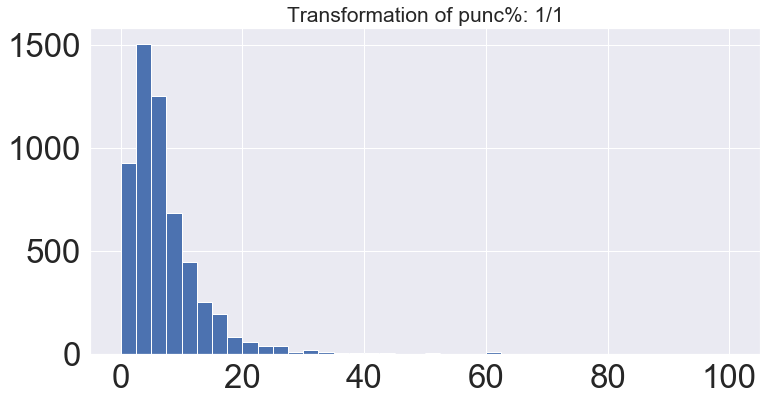

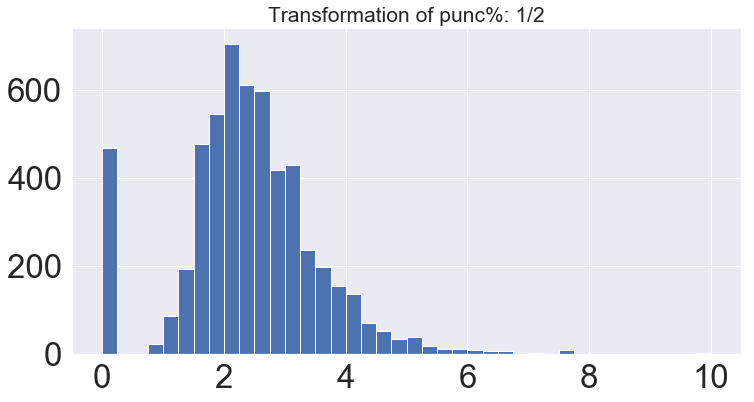

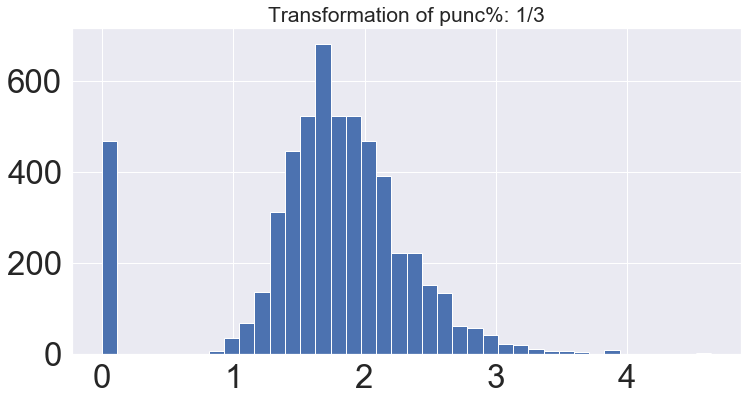

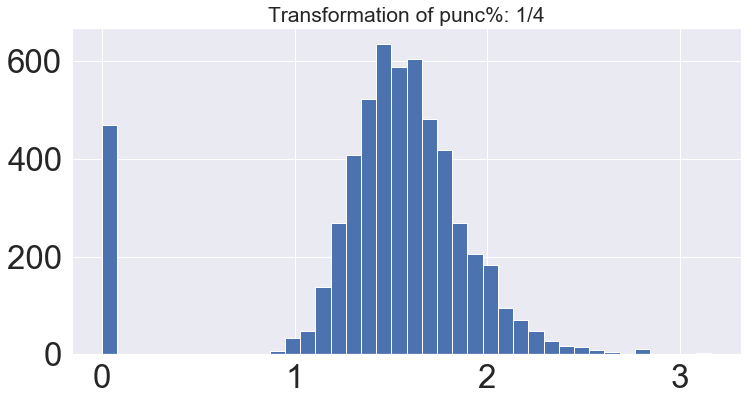

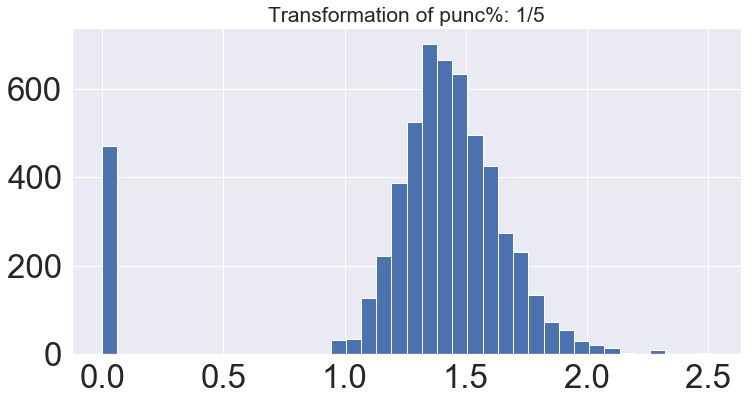

In [167]:
for i in [1,2,3,4,5]:
    plt.figure(figsize=(12, 6))
    plt.hist((df['punc%'])**(1/i), bins = 40)
    
    plt.title("Transformation of punc%: 1/{}".format(str(i)),fontsize = 21)
    plt.show()

## Applying transformations:

After applying the transformation we will re-plot KDE and check how it looks!

In [170]:
df['capital%'] = (df['capital%'])**(1/4)
df['punc%'] = (df['punc%'])**(1/4)

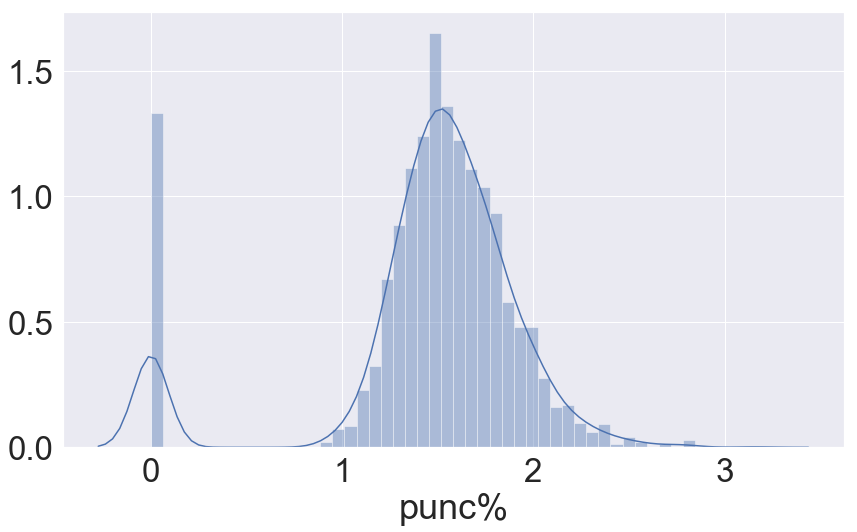

In [184]:
plt.figure(figsize=(14, 8))
ax = sns.distplot(df['punc%'], kde=True)

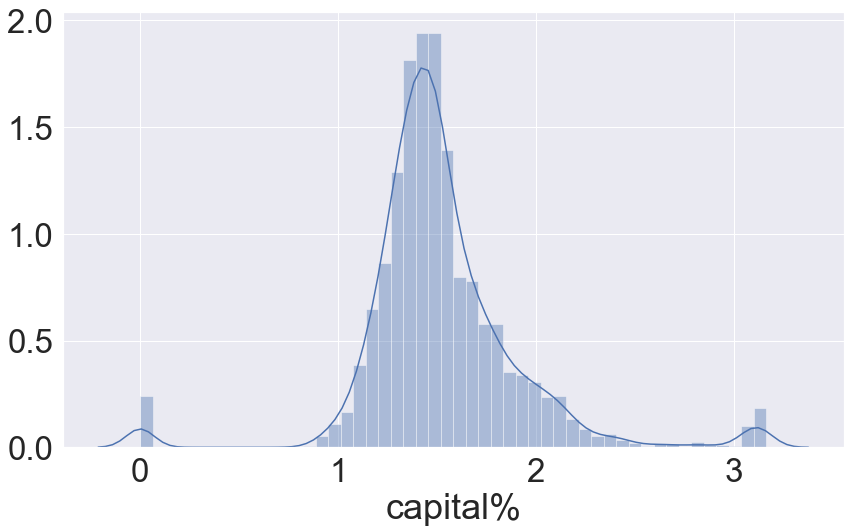

In [183]:
plt.figure(figsize=(14, 8))
ax = sns.distplot(df['capital%'], kde=True)

__It looks Beautiful!__

# NOW MACHINE LEARNING! 

For the purpose of this notbook. I will not not focus on trying different models but rather trying out only one that I am learning right now i.e. Xtreme Gradient Boosting. This is solely for practice purposes & is no representation of how we would deploy a model in real time setting.

__I will use Term frequency–inverse document frequency (TFIDF) as our word-vector representation.__

I should also run cross validation but I won't because XGboost cannot be paralellized therefore it takes a long time to run. To save time I will initialize the model & just run gridsearchCV for hypter parameter tuning. 

__We will optimize for f1 score.__



In [186]:
from xgboost.sklearn import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score 

In [196]:
df['final_text']=[" ".join(text) for text in df['lemmatized_words'].values]
df.head()

,labels,text,cleaned_text,tokenized_words,stop_words_removed,lemmatized_words,length_text,capital%,punc%,final_text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[jurong, crazy, bugis, la, buffet, cine, amore...","[jurong, crazy, bugis, la, buffet, cine, amore...",92,1.343809,1.768553,jurong crazy bugis la buffet cine amore wat
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[lar, joking, wif, oni]","[lar, joking, wif, oni]",24,1.699027,2.236068,lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",128,1.671824,1.471455,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[dun, hor]","[dun, hor]",39,1.504828,1.980498,dun hor
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, usf, lives]","[nah, dont, usf, life]",49,1.421406,1.421406,nah dont usf life


Initalize the TfidfVectorizer then fit transform the data

In [207]:
tfidf_vec = TfidfVectorizer()
X_tfidf = tfidf_vec.fit_transform(df['final_text'])
print(X_tfidf.shape)


(5574, 8476)


### Creating X: features, and y: labels

In [208]:
X = pd.concat([df['length_text'], df['punc%'],df['capital%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X.head()

,length_text,punc%,capital%,0,1,2,3,4,5,6,...,8466,8467,8468,8469,8470,8471,8472,8473,8474,8475
0,92,1.768553,1.343809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24,2.236068,1.699027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128,1.471455,1.671824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39,1.980498,1.504828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49,1.421406,1.421406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Our X features look like the table above

We will also binary encode our spam and ham to 0 and 1

In [218]:
y = df['labels']
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y = lb.fit_transform(y)

In [222]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y, random_state = 42)

## Intial Model: 

I will initialize the model with introductory parameters. I have assigned a value of 3 to scale_pos_weight parameter to account for imblanaced class distribution. This parameter gives a higher weight to the minority class

We then fit the model & predict our labels

In [230]:
xgb = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=3,
 seed=27)

In [231]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=3, seed=27, silent=True,
       subsample=0.8)

In [232]:
y_pred_xgb = xgb.predict(X_test)
predictions = [round(value) for value in y_pred_xgb]

In [233]:
confusion_matrix(y_pred = predictions, y_true=y_test)

array([[947,  19],
       [ 16, 133]], dtype=int64)

In [234]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       966
          1       0.88      0.89      0.88       149

avg / total       0.97      0.97      0.97      1115



From our classification report we can see that our intial results are pretty good! Our precision & recall balanced meaning that sometimes in inbalanaced classification problem either recall or precision suffers but in this case they are both close.

We will now check our roc_auc_score

In [235]:
roc_auc_score(y_test,predictions , average='macro', sample_weight=None)

0.9364743563021941

Our roc_auc score seems pretty decent too. Let's try to optimize for f1 score using gridsearch. 

We will pass in a grid of parameters to test

## Initial Results: 
Precision is the fraction of results classified as positive, which are indeed positive.

Recall is the fraction of all positive results which were detected.

As we can see from our classification report. Our precision is 0.88 & recall is 0.87. These are pretty decent scores. 

If we look at our confusion matrix we can see 16 of spam text messages were missclassified as ham (non-spam)

And 19 text messages that were ham that were misclassified as spam. 

__False Positives = 16__

__False Negatives = 19__

For our spam classifier we dont't want regular text messages classifed as spam so we could like to decrease or __minimize false positives__ 

We could improve precision because if a spam message passes our filter occasionally. That's okay as opposed to completely missing the normal non spam text message.

We could further tune our model using hyper parameter tuning

## Hyperparameter tuned model: 

Due to computational time I decided not to run hyperparameter tuning. However the code for it is as follows:

In [ ]:
gbm_param_grid = {
        'learning_rate' : np.arange(0.05,1.05,0.05),
        'n_estimators'  : np.arange(200,1600,200),
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'scale_pos_weight': [1,2,3,4,5,6]
        }


In [ ]:
xgb2 = XGBClassifier(
 max_depth=5,
 objective= 'binary:logistic',
 nthread=4,
 seed=42)

We would create a "grid" of parameters and optimize for precision for example using GridSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb2, param_distributions=gbm_param_grid, n_iter=25, scoring='precision',cv=4,verbose=1)

In [ ]:
random_search.fit(X_train,y_train)

In [ ]:
random_search.best_params_ # Our best parameters 

In [ ]:
bestxbg = random_search.best_estimator_.fit(X_train, y_train) # fit the model with best parameters

In [ ]:
y_pred_xgb_best = bestxbg.predict(X_test) # predict the labels
predictions = [round(value) for value in y_pred_xgb_best]

In [ ]:
print(classification_report(y_test,predictions)) 

In [ ]:
roc_auc_score(y_test,predictions , average='macro', sample_weight=None)

# Conclusion: 

In this notebook:

1. I applied data pre-processing techniques pretaining to NLP

2. Developed an intuition for feature engineering & feature validation

3. Developed a bigger corpus for stopwords using external sources

4. Applied simple transformations

5. Used tfidf to create a XGboost model 
 


# Areas of improvement: 

1. I could have utilized or developed a text message SMS slang corpus for better training

2. I could have applied cross validation

3. I could have tried different models for comparison

4. I could have hyper-tuned the model but due to computational time I choose to skip that part. 



# Thank you for reading

# End of project
